# Handwritten Digits Classification

Data obtained from http://yann.lecun.com/exdb/mnist/

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

from sklearn import metrics
from sklearn.neural_network import MLPClassifier

In [43]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [41]:
train.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

Printing samples of digits for visual understandings

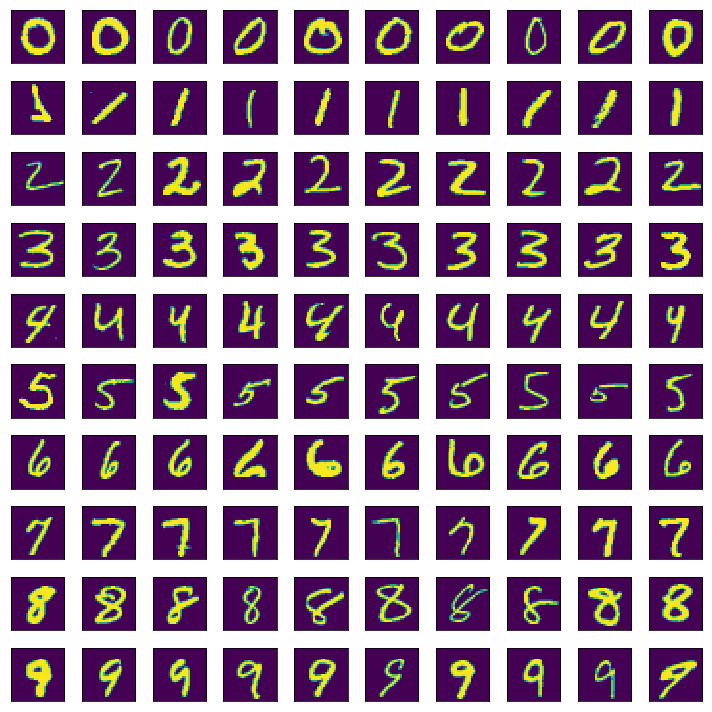

In [57]:
plt.figure(figsize=(10,10))
for j in range(0,10):
    j_train = train.loc[train['label']==j]
    j_label = j_train['label']
    j_data = j_train.drop('label',axis=1)
    for i in range(0,10):
        plt.subplot(10,10,j*10+i+1)
        grid_data = j_data.iloc[j*10+i].as_matrix().reshape(28,28)
        plt.imshow(grid_data,interpolation='none')
        plt.xticks([])
        plt.yticks([])
plt.tight_layout()

In [63]:
train_label = train['label']
data = train.drop("label",axis=1)

Dimension reduction using PCA

In [58]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import datasets

Text(0,0.5,'% of variance explained')

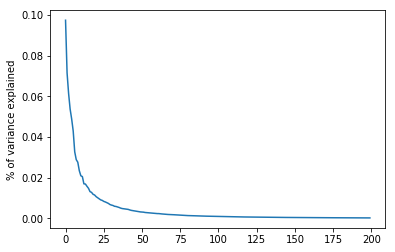

In [61]:
pca = PCA(n_components=200)
pca.fit(data)
plt.plot(pca.explained_variance_ratio_)
plt.ylabel('% of variance explained')


In [64]:
pca = PCA(n_components=50)
pca.fit(data)
PCtrain = pd.DataFrame(pca.transform(data))
PCtrain['label'] = train_label
PCtest = pd.DataFrame(pca.transform(test))

Neural Network

In [80]:
def fitnshow(n,traindata):
    y = traindata['label'][0:n]
    X=traindata.drop('label',axis=1)[0:n] 
    clf = MLPClassifier(solver='lbfgs',alpha=1e-5,hidden_layer_sizes=(3500))
    clf.fit(X,y)

    predicted = clf.predict(traindata.drop('label',axis=1)[n+1:42000])
    expected = traindata['label'][n+1:42000]
    print (metrics.classification_report(expected,predicted))
    print (metrics.confusion_matrix(expected,predicted))

In [81]:
fitnshow(20000,PCtrain)

             precision    recall  f1-score   support

          0       0.97      0.97      0.97      2200
          1       0.98      0.99      0.98      2418
          2       0.96      0.96      0.96      2167
          3       0.95      0.94      0.95      2270
          4       0.96      0.96      0.96      2101
          5       0.94      0.96      0.95      2001
          6       0.97      0.98      0.97      2155
          7       0.96      0.97      0.97      2331
          8       0.95      0.94      0.95      2148
          9       0.95      0.94      0.94      2208

avg / total       0.96      0.96      0.96     21999

[[2145    1    5    2    2    8   21    1   10    5]
 [   0 2383    6    3    8    4    2    4    7    1]
 [  12    3 2083   16   11    3    5   20   11    3]
 [   9    4   23 2133    1   43    1   16   23   17]
 [   7    5    3    0 2025    0   13    7    6   35]
 [  10    2    2   36    6 1911    7    5   12   10]
 [  12    3    6    0    5   19 2106    1  

In [82]:
n = int(42000*9/10)
fitnshow(n,PCtrain)

             precision    recall  f1-score   support

          0       0.98      0.98      0.98       454
          1       0.98      0.99      0.98       458
          2       0.97      0.96      0.97       392
          3       0.97      0.96      0.97       448
          4       0.99      0.97      0.98       438
          5       0.97      0.94      0.95       354
          6       0.96      0.99      0.97       413
          7       0.98      0.97      0.97       421
          8       0.95      0.97      0.96       397
          9       0.95      0.96      0.96       424

avg / total       0.97      0.97      0.97      4199

[[447   0   0   0   1   1   4   0   0   1]
 [  0 452   0   2   0   0   0   0   3   1]
 [  2   0 378   3   0   1   1   3   3   1]
 [  1   1   0 431   1   6   0   1   4   3]
 [  1   2   0   0 427   0   2   0   2   4]
 [  2   2   0   2   0 334   5   1   4   4]
 [  2   0   0   0   1   3 407   0   0   0]
 [  0   0   6   0   1   1   0 407   1   5]
 [  1   3   1   4

In [85]:
y = PCtrain['label'][0:n]
X=PCtrain.drop('label',axis=1)[0:n] 
clf = MLPClassifier(activation='relu', batch_size='auto',
                    beta_1 = 0.9, beta_2 = 0.999, early_stopping = True,
                    epsilon=1e-08, hidden_layer_sizes=(3000,), 
                    learning_rate = 'constant', learning_rate_init=0.001,
                    max_iter=200, momentum=0.9, random_state=1,
                    solver='lbfgs',alpha=1e-5)
clf.fit(X,y)

predicted = clf.predict(PCtrain.drop('label',axis=1)[n+1:42000])
expected = PCtrain['label'][n+1:42000]
print (metrics.classification_report(expected,predicted))
print (metrics.confusion_matrix(expected,predicted))

             precision    recall  f1-score   support

          0       0.98      0.98      0.98       454
          1       0.99      0.99      0.99       458
          2       0.95      0.97      0.96       392
          3       0.97      0.96      0.97       448
          4       0.97      0.97      0.97       438
          5       0.97      0.96      0.97       354
          6       0.98      0.99      0.98       413
          7       0.98      0.96      0.97       421
          8       0.94      0.96      0.95       397
          9       0.97      0.96      0.96       424

avg / total       0.97      0.97      0.97      4199

[[445   1   1   0   1   1   3   0   2   0]
 [  0 455   0   0   0   0   1   1   1   0]
 [  1   0 379   3   2   0   1   2   2   2]
 [  1   0   0 429   1   8   0   1   5   3]
 [  1   1   2   0 426   0   2   0   2   4]
 [  2   1   1   2   0 341   1   0   5   1]
 [  3   0   1   0   2   0 407   0   0   0]
 [  0   0   7   1   2   0   0 405   3   3]
 [  1   2   3   4